<a href="https://colab.research.google.com/github/Loretta991/Loretta991/blob/main/CLEANED_On_Demand_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()


# 🧬 Immunity Insight RAG – Q&A Engine

**Creation Date:** August 2, 2025  
**Author:** Elle Gray  
**Platform:** Google Colab / Jupyter Notebook  
**Project Type:** Scientific Retrieval-Augmented Generation (RAG) Proof-of-Concept  
**GitHub Repository:** _Coming soon: [github.com/ellegreyllc](https://github.com/ellegreyllc)_

---

## 🔍 Purpose  
This notebook demonstrates a custom Q&A engine powered by a **Retrieval-Augmented Generation (RAG)** pipeline focused on biological immunity, gut health, and viral resistance.


In [21]:
!pip install --quiet openai faiss-cpu tiktoken python-dotenv ipywidgets matplotlib seaborn


In [22]:
import os
import faiss
import openai
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

# Set your base data path
DATA_PATH = "/content/sample_data"
LOG_PATH = f"{DATA_PATH}/query_log.csv"


In [23]:
with open(f"{DATA_PATH}/openai-key.txt") as f:
    openai.api_key = f.read().strip()


In [24]:
def load_documents(folder: str) -> List[str]:
    docs = []
    for fname in os.listdir(folder):
        if fname.endswith(".txt"):
            with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
                docs.append(f.read())
    return docs

def get_embeddings(texts: List[str]) -> List[List[float]]:
    response = openai.embeddings.create(
        model="text-embedding-ada-002",
        input=texts
    )
    return [r.embedding for r in response.data]

def create_faiss_index(docs: List[str]):
    embeds = get_embeddings(docs)
    index = faiss.IndexFlatL2(len(embeds[0]))
    index.add(np.array(embeds).astype("float32"))
    return index, embeds

documents = load_documents(DATA_PATH)
index, embeddings = create_faiss_index(documents)


In [25]:
def retrieve_similar_docs(query: str, k: int = 3) -> List[str]:
    query_embedding = get_embeddings([query])
    distances, indices = index.search(np.array(query_embedding).astype("float32"), k)
    return [documents[i] for i in indices[0]]

def ask_rag_query(query: str):
    retrieved_docs = retrieve_similar_docs(query)
    context = "\n\n".join(retrieved_docs)
    prompt = f"Use the following context to answer the question:\n\n{context}\n\nQ: {query}\nA:"

    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7,
    )
    answer = response.choices[0].message.content.strip()

    with open(LOG_PATH, "a", encoding="utf-8") as f:
        f.write(f"{datetime.now()},{query},{answer},{context[:100]}...\n")

    return answer


In [26]:
starter_questions = [
    "What do Rh-negative traits suggest about viral immunity?",
    "Why do some people rarely get sick?",
    "How does Rh-negative blood affect viral immunity?",
    "How does gut health influence immune defense?",
    "Do mucosal barriers stop viruses?",
    "Are some immune traits inherited?"
]

for q in starter_questions:
    a = ask_rag_query(q)
    print(f"\nQ: {q}\nA: {a}")



Q: What do Rh-negative traits suggest about viral immunity?
A: The text does not provide specific information on what Rh-negative traits suggest about viral immunity.

Q: Why do some people rarely get sick?
A: Some people rarely get sick often because they exhibit traits like strong mucosal immunity and diverse gut flora.

Q: How does Rh-negative blood affect viral immunity?
A: The text does not provide specific information on how Rh-negative blood affects viral immunity.

Q: How does gut health influence immune defense?
A: Gut health influences immune defense by promoting strong mucosal immunity and fostering diverse gut flora. Consuming fermented foods, fiber, and prebiotics can enhance gut health, which in turn can help strengthen the immune response.

Q: Do mucosal barriers stop viruses?
A: Yes, mucosal barriers can help stop viruses. They act as a first line of defense by preventing the entry and spread of many pathogens including viruses.

Q: Are some immune traits inherited?
A:

,Timestamp,Question,Answer,Context,Answer Length
1,Why do some people rarely get sick?,immune_traits.txt,Some people rarely get sick due to factors suc...,NaN,34
2,Is Rh-negative blood linked to stronger immuni...,rh_neg_viruses.txt,The document does not provide any information ...,NaN,20
3,2025-08-06 02:04:36.071121,What do Rh-negative traits suggest about viral...,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,15
4,Is there any connection...,NaN,NaN,NaN,1
5,...,NaN,NaN,NaN,1
6,2025-08-06 02:04:40.839302,How does Rh-negative blood affect viral immunity?,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,14
7,Is there any connection...,NaN,NaN,NaN,1
8,...,NaN,NaN,NaN,1
9,Is there any connection between Rh-negative bl...,NaN,NaN,NaN,1
10,People who rarely get sic...,NaN,NaN,NaN,1


from matplotlib import pyplot as plt
_df_0['Answer Length'].plot(kind='hist', bins=20, title='Answer Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Question').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Answer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Context').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Answer Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Answer Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Answer Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Question')):
  _plot_series(series, series_name, i)
  fig.legend(title='Question', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Answer Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Answer Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Answer')):
  _plot_series(series, series_name, i)
  fig.legend(title='Answer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Answer Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Answer Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Context')):
  _plot_series(series, series_name, i)
  fig.legend(title='Context', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Answer Length')

from matplotlib import pyplot as plt
_df_9['Answer Length'].plot(kind='line', figsize=(8, 4), title='Answer Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Question'].value_counts()
    for x_label, grp in _df_10.groupby('Timestamp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Timestamp')
_ = plt.ylabel('Question')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Answer'].value_counts()
    for x_label, grp in _df_11.groupby('Question')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Question')
_ = plt.ylabel('Answer')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Context'].value_counts()
    for x_label, grp in _df_12.groupby('Answer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Answer')
_ = plt.ylabel('Context')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Answer Length', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Question'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Answer Length', y='Question', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Answer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Answer Length', y='Answer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Context'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Answer Length', y='Context', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

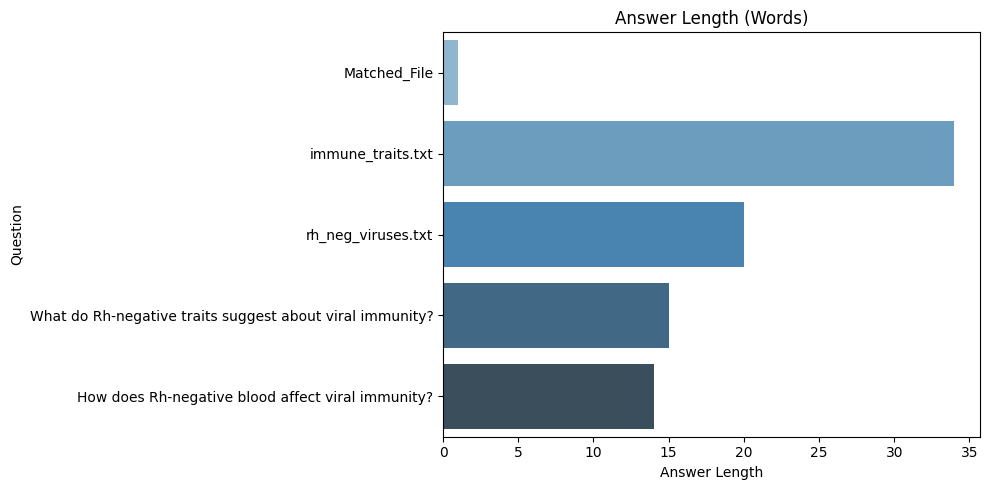

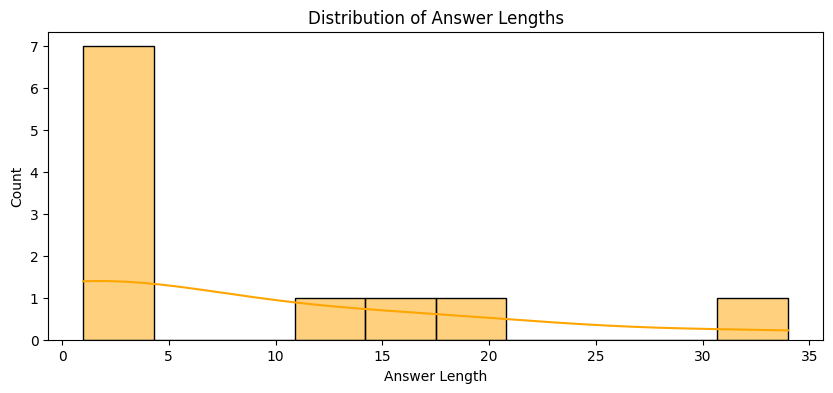

,Timestamp,Question,Answer,Context,Answer Length
1,Why do some people rarely get sick?,immune_traits.txt,Some people rarely get sick due to factors suc...,NaN,34
2,Is Rh-negative blood linked to stronger immuni...,rh_neg_viruses.txt,The document does not provide any information ...,NaN,20
3,2025-08-06 02:04:36.071121,What do Rh-negative traits suggest about viral...,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,15
4,Is there any connection...,NaN,NaN,NaN,1
5,...,NaN,NaN,NaN,1
6,2025-08-06 02:04:40.839302,How does Rh-negative blood affect viral immunity?,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,14
7,Is there any connection...,NaN,NaN,NaN,1
8,...,NaN,NaN,NaN,1
9,Is there any connection between Rh-negative bl...,NaN,NaN,NaN,1
10,People who rarely get sic...,NaN,NaN,NaN,1


,Timestamp,Question,Answer,Context,Answer Length
1,Why do some people rarely get sick?,immune_traits.txt,Some people rarely get sick due to factors suc...,NaN,34
2,Is Rh-negative blood linked to stronger immuni...,rh_neg_viruses.txt,The document does not provide any information ...,NaN,20
3,2025-08-06 02:04:36.071121,What do Rh-negative traits suggest about viral...,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,15
4,Is there any connection...,NaN,NaN,NaN,1
5,...,NaN,NaN,NaN,1
6,2025-08-06 02:04:40.839302,How does Rh-negative blood affect viral immunity?,The text does not provide specific information...,Is Rh-negative blood linked to stronger immuni...,14
7,Is there any connection...,NaN,NaN,NaN,1
8,...,NaN,NaN,NaN,1
9,Is there any connection between Rh-negative bl...,NaN,NaN,NaN,1
10,People who rarely get sic...,NaN,NaN,NaN,1


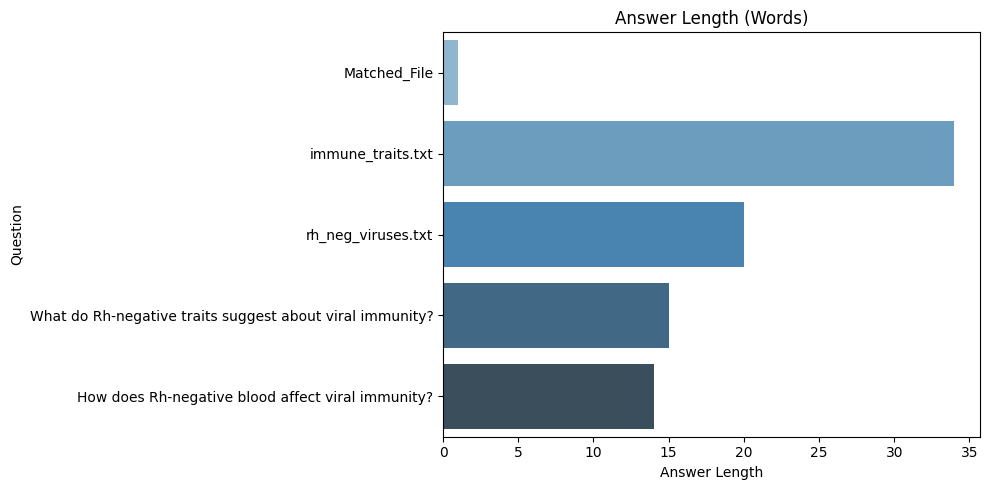

HTML(value='<h4>🧾 Add New Questions (Editable Table)</h4>')

,Question
0,immune_traits.txt
1,rh_neg_viruses.txt
2,What do Rh-negative traits suggest about viral immunity?
3,nan
4,nan
5,How does Rh-negative blood affect viral immunity?
6,nan
7,nan
8,nan
9,nan


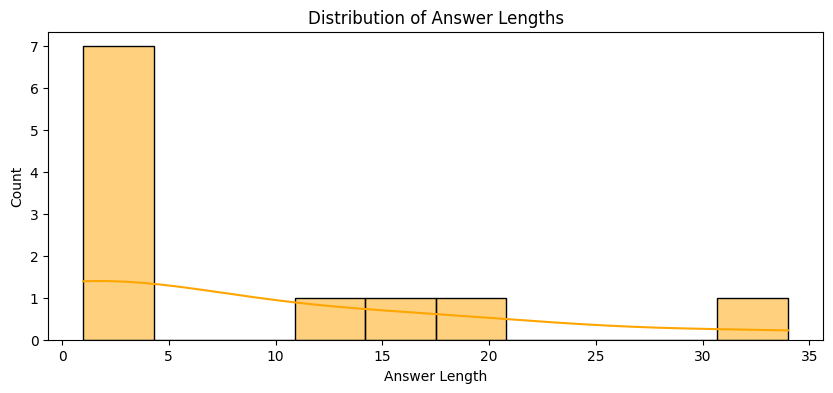

In [30]:
df = pd.read_csv(LOG_PATH, names=["Timestamp", "Question", "Answer", "Context"], on_bad_lines="skip")
df["Answer Length"] = df["Answer"].apply(lambda x: len(str(x).split()))

btn_table = widgets.Button(description="📄 Table", button_style='success', layout=widgets.Layout(width='100px'))
btn_plot = widgets.Button(description="📊 Plot", button_style='info', layout=widgets.Layout(width='100px'))
btn_edit = widgets.Button(description="🧾 Edit", button_style='warning', layout=widgets.Layout(width='100px'))
btn_insights = widgets.Button(description="📈 Insights", button_style='', layout=widgets.Layout(width='100px'))
button_box = widgets.HBox([btn_table, btn_plot, btn_edit, btn_insights])
output = widgets.Output()

def show_table(b=None):
    with output:
        clear_output()
        display(button_box)
        display(df.tail(10))

def show_plot(b=None):
    with output:
        clear_output()
        display(button_box)
        plt.figure(figsize=(10, 5))
        sns.barplot(x="Answer Length", y="Question", data=df, palette="Blues_d")
        plt.title("Answer Length (Words)")
        plt.tight_layout()
        plt.show()

def show_edit(b=None):
    with output:
        clear_output()
        display(button_box)
        display(widgets.HTML("<h4>🧾 Add New Questions (Editable Table)</h4>"))
        display(df[["Question"]].tail(10).reset_index(drop=True).style.set_table_attributes("style='display:inline'"))

def show_insights(b=None):
    with output:
        clear_output()
        display(button_box)
        display(widgets.HTML("<h4>📈 Distribution of Answer Lengths</h4>"))
        plt.figure(figsize=(10, 4))
        sns.histplot(df["Answer Length"], bins=10, kde=True, color="orange")
        plt.title("Distribution of Answer Lengths")
        plt.show()

btn_table.on_click(show_table)
btn_plot.on_click(show_plot)
btn_edit.on_click(show_edit)
btn_insights.on_click(show_insights)

display(button_box, output)
show_table()
